In [25]:
import os
import glob
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
# merging earthquake data into 1 dataframe
# reading csv files
file_extension = '.csv'
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
all_filenames

['eq_data_1.csv', 'eq_data_2.csv', 'eq_data_3.csv', 'eq_data_4.csv']

In [27]:
quake = pd.concat([pd.read_csv(f) for f in all_filenames])

In [29]:
quake.shape, quake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40844 entries, 0 to 7088
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             40844 non-null  object 
 1   latitude         40844 non-null  float64
 2   longitude        40844 non-null  float64
 3   depth            40844 non-null  float64
 4   mag              40844 non-null  float64
 5   magType          40844 non-null  object 
 6   nst              270 non-null    float64
 7   gap              40531 non-null  float64
 8   dmin             40509 non-null  float64
 9   rms              40844 non-null  float64
 10  net              40844 non-null  object 
 11  id               40844 non-null  object 
 12  updated          40844 non-null  object 
 13  place            40844 non-null  object 
 14  type             40844 non-null  object 
 15  horizontalError  40621 non-null  float64
 16  depthError       40844 non-null  float64
 17  magError     

((40844, 22), None)

In [30]:
# converting dataframe into geodataframe 
# see here for more info - https://geopandas.org/gallery/create_geopandas_from_pandas.html
quakes_gdf = gpd.GeoDataFrame(quake, geometry=gpd.points_from_xy(quake.longitude, quake.latitude))
quakes_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 40844 entries, 0 to 7088
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   time             40844 non-null  object  
 1   latitude         40844 non-null  float64 
 2   longitude        40844 non-null  float64 
 3   depth            40844 non-null  float64 
 4   mag              40844 non-null  float64 
 5   magType          40844 non-null  object  
 6   nst              270 non-null    float64 
 7   gap              40531 non-null  float64 
 8   dmin             40509 non-null  float64 
 9   rms              40844 non-null  float64 
 10  net              40844 non-null  object  
 11  id               40844 non-null  object  
 12  updated          40844 non-null  object  
 13  place            40844 non-null  object  
 14  type             40844 non-null  object  
 15  horizontalError  40621 non-null  float64 
 16  depthError       40844 non-null  

In [31]:
coastlines_path = os.path.join("ne_50m_coastline",
                               "ne_50m_coastline.shp")
coastlines = gpd.read_file(coastlines_path)


In [42]:
countries_path = os.path.join("ne_50m_admin_0_countries", 
                              "ne_50m_admin_0_countries.shp")
countries = gpd.read_file(countries_path)

In [32]:
tectonic_path = os.path.join("tectonicplates-master",
                               "PB2002_boundaries.shp")
tectonic = gpd.read_file(tectonic_path)


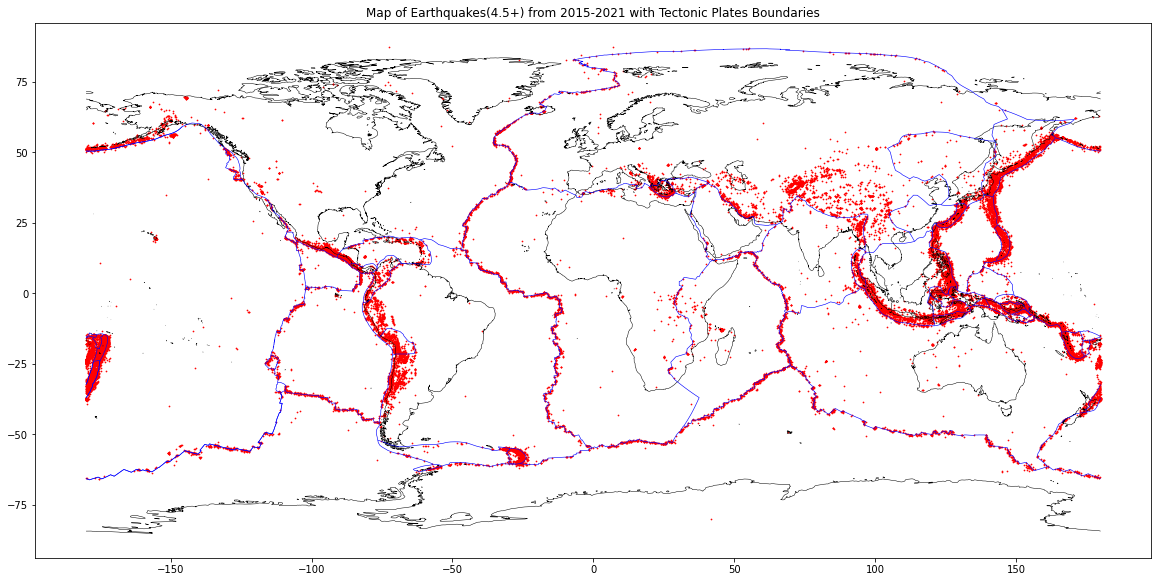

In [45]:
f, ax1 = plt.subplots(figsize=(20, 12))
coastlines.plot(ax=ax1, color = 'black', linewidth = .5)
#countries.plot(ax=ax1, facecolor='white', edgecolor='grey')
tectonic.plot(ax=ax1, color = 'blue', linewidth = .6)
quakes_gdf.plot(ax=ax1, color = 'red', markersize = .5)
ax1.set(title="Map of Earthquakes(4.5+) from 2015-2021 with Tectonic Plates Boundaries")
plt.savefig('day2_eq_tectonic')
plt.show()

* Data
1. Earthquakes <https://earthquake.usgs.gov/earthquakes/search/>
2. Tectonic Plates boundaries <https://github.com/fraxen/tectonicplates>

* Tutorial
1. <https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-spatial-data/use-vector-data/>
2. <https://levelup.gitconnected.com/plotting-usgs-earthquake-data-with-folium-8f11ddc21950>
3. <https://geopandas.org/gallery/create_geopandas_from_pandas.html>